In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.model_selection import RandomizedSearchCV

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
import keras_tuner as kt

In [4]:
data =pd.read_csv('adult.csv')
df= pd.DataFrame(data)
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.shape

(48842, 15)

In [5]:
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [7]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
for col in df.columns:
  print(f"\033[1m{col}\033[0m: {df[col].nunique()}")

age: 74
workclass: 9
fnlwgt: 28523
education: 16
educational-num: 16
marital-status: 7
occupation: 15
relationship: 6
race: 5
gender: 2
capital-gain: 123
capital-loss: 99
hours-per-week: 96
native-country: 42
income: 2


In [9]:
for col in df.columns.values.tolist():
  print(f"\033[1m{col}\033[0m: {df[col].unique()}")

age: [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
workclass: ['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
fnlwgt: [226802  89814 336951 ... 129912 255835 257302]
education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
educational-num: [ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Tr

In [5]:
df = df[~df.isin(['?']).any(axis=1)]
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [11]:
df.shape

(45222, 15)

In [12]:
for col in df.columns.values.tolist():
  print(f"\033[1m{col}\033[0m: {df[col].unique()}")

age: [25 38 28 44 34 63 24 55 65 36 26 48 43 20 37 45 22 23 54 32 46 56 17 29
 39 52 18 21 42 33 30 47 41 19 69 50 31 59 49 58 40 27 57 61 51 73 53 80
 62 35 72 64 68 66 60 67 71 70 90 77 81 74 78 82 75 85 76 89 83 79 88 87
 84 86]
workclass: ['Private' 'Local-gov' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay']
fnlwgt: [226802  89814 336951 ... 199655 255835 257302]
education: ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' '5th-6th' 'Assoc-voc' '9th' 'Doctorate'
 '12th' '1st-4th' 'Preschool']
educational-num: [ 7  9 12 10  6 15  4 13 14  3 11  5 16  8  2  1]
marital-status: ['Never-married' 'Married-civ-spouse' 'Widowed' 'Separated' 'Divorced'
 'Married-spouse-absent' 'Married-AF-spouse']
occupation: ['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' 'Other-service'
 'Prof-specialty' 'Craft-repair' 'Adm-clerical' 'Exec-managerial'
 'Tech-support' 'Sales' 'Priv-house-serv' 'Transport-moving'
 'Handle

In [13]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,4.522200e+04,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,1.897347e+05,10.118460,1101.430344,88.595418,40.938017
std,13.217870,1.056392e+05,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173882e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783160e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379260e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
df.duplicated().sum()
df.shape

(45222, 15)

In [6]:
df = df.drop_duplicates()
df.shape

(45175, 15)

In [7]:
df_copy = df

In [8]:
df_copy = df_copy.drop(columns=['fnlwgt'])
df_copy

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [9]:
df_copy['work_experience'] = df_copy['age'] - (df_copy['educational-num'] + 7 ) # assuming that education starts at 7 year's

In [10]:
df_copy['workclass'] = df_copy['workclass'].replace({
    'Local-gov': 'Gov',
    'Federal-gov': 'Gov',
    'State-gov': 'Gov',
    'Without-pay': 'Other',
    'Self-emp-not-inc': 'Self-emp',
    'Self-emp-inc': 'Self-emp',
    'Private': 'Private'
})


In [11]:
# Create the simplified education categories
df_copy['education_level'] = df_copy['education'].apply(lambda x: 
                                             'HS or below' if x == 'HS-grad' or x == '11th' or x == '10th' or x == '9th' or x == '7th-8th' or x == '5th-6th' or x == '1st-4th' or x == 'Preschool' 
                                             else 'Associates' if x == 'Assoc-acdm' or x == 'Assoc-voc'
                                             else 'Bachelor' if x == 'Bachelors'
                                             else 'Postgraduate' if x == 'Masters' or x == 'Doctorate'
                                             else 'Other')

# HS or below', 'Associates' ,'Bachelor' ,'Postgraduate', 'Other' (for any education levels that don't fit the first four categories)

In [12]:
df_copy['net_gain_loss'] = df_copy['capital-gain'] - df_copy['capital-loss']

In [13]:
# Simplify the marital status feature
df_copy['marital_status'] = df_copy['marital-status'].replace({
    'Never-married': 'Single',
    'Married-civ-spouse': 'Married',
    'Divorced': 'Divorced',
    'Widowed': 'Widowed',
    'Separated': 'Separated',
    'Married-spouse-absent': 'Separated',
    'Married-AF-spouse': 'Married'
})

In [14]:
df_copy['country'] = df_copy['native-country'].apply(
    lambda x: 'USA' if x == 'United-States' else 'Other'
)

In [15]:
# Drop unnecessary columns
df_copy = df_copy.drop(['capital-gain', 'capital-loss', 'education', 'marital-status', 'educational-num', 'native-country'], axis=1)

In [16]:
df_copy

,age,workclass,occupation,relationship,race,gender,hours-per-week,income,work_experience,education_level,net_gain_loss,marital_status,country
0,25,Private,Machine-op-inspct,Own-child,Black,Male,40,<=50K,11,HS or below,0,Single,USA
1,38,Private,Farming-fishing,Husband,White,Male,50,<=50K,22,HS or below,0,Married,USA
2,28,Gov,Protective-serv,Husband,White,Male,40,>50K,9,Associates,0,Married,USA
3,44,Private,Machine-op-inspct,Husband,Black,Male,40,>50K,27,Other,7688,Married,USA
5,34,Private,Other-service,Not-in-family,White,Male,30,<=50K,21,HS or below,0,Single,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,Tech-support,Wife,White,Female,38,<=50K,8,Associates,0,Married,USA
48838,40,Private,Machine-op-inspct,Husband,White,Male,40,>50K,24,HS or below,0,Married,USA
48839,58,Private,Adm-clerical,Unmarried,White,Female,40,<=50K,42,HS or below,0,Widowed,USA
48840,22,Private,Adm-clerical,Own-child,White,Male,20,<=50K,6,HS or below,0,Single,USA


income
<=50K    33973
>50K     11202
Name: count, dtype: int64

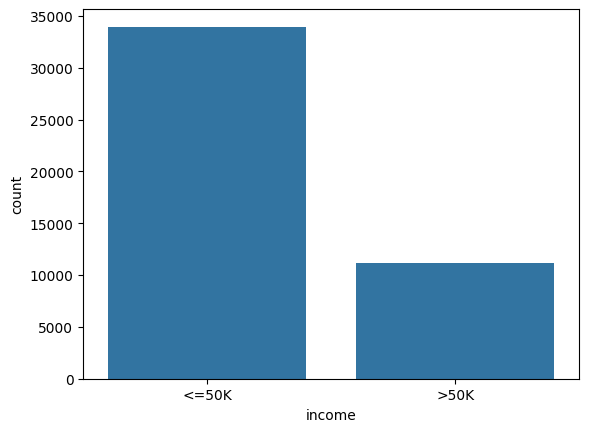

In [126]:
sns.countplot(x = df_copy['income'])
df_copy['income'].value_counts()

In [17]:
categorical_features = df_copy.select_dtypes(object)
numerical_features = df_copy.select_dtypes(exclude=object)
categorical_features

,workclass,occupation,relationship,race,gender,income,education_level,marital_status,country
0,Private,Machine-op-inspct,Own-child,Black,Male,<=50K,HS or below,Single,USA
1,Private,Farming-fishing,Husband,White,Male,<=50K,HS or below,Married,USA
2,Gov,Protective-serv,Husband,White,Male,>50K,Associates,Married,USA
3,Private,Machine-op-inspct,Husband,Black,Male,>50K,Other,Married,USA
5,Private,Other-service,Not-in-family,White,Male,<=50K,HS or below,Single,USA
...,...,...,...,...,...,...,...,...,...
48837,Private,Tech-support,Wife,White,Female,<=50K,Associates,Married,USA
48838,Private,Machine-op-inspct,Husband,White,Male,>50K,HS or below,Married,USA
48839,Private,Adm-clerical,Unmarried,White,Female,<=50K,HS or below,Widowed,USA
48840,Private,Adm-clerical,Own-child,White,Male,<=50K,HS or below,Single,USA


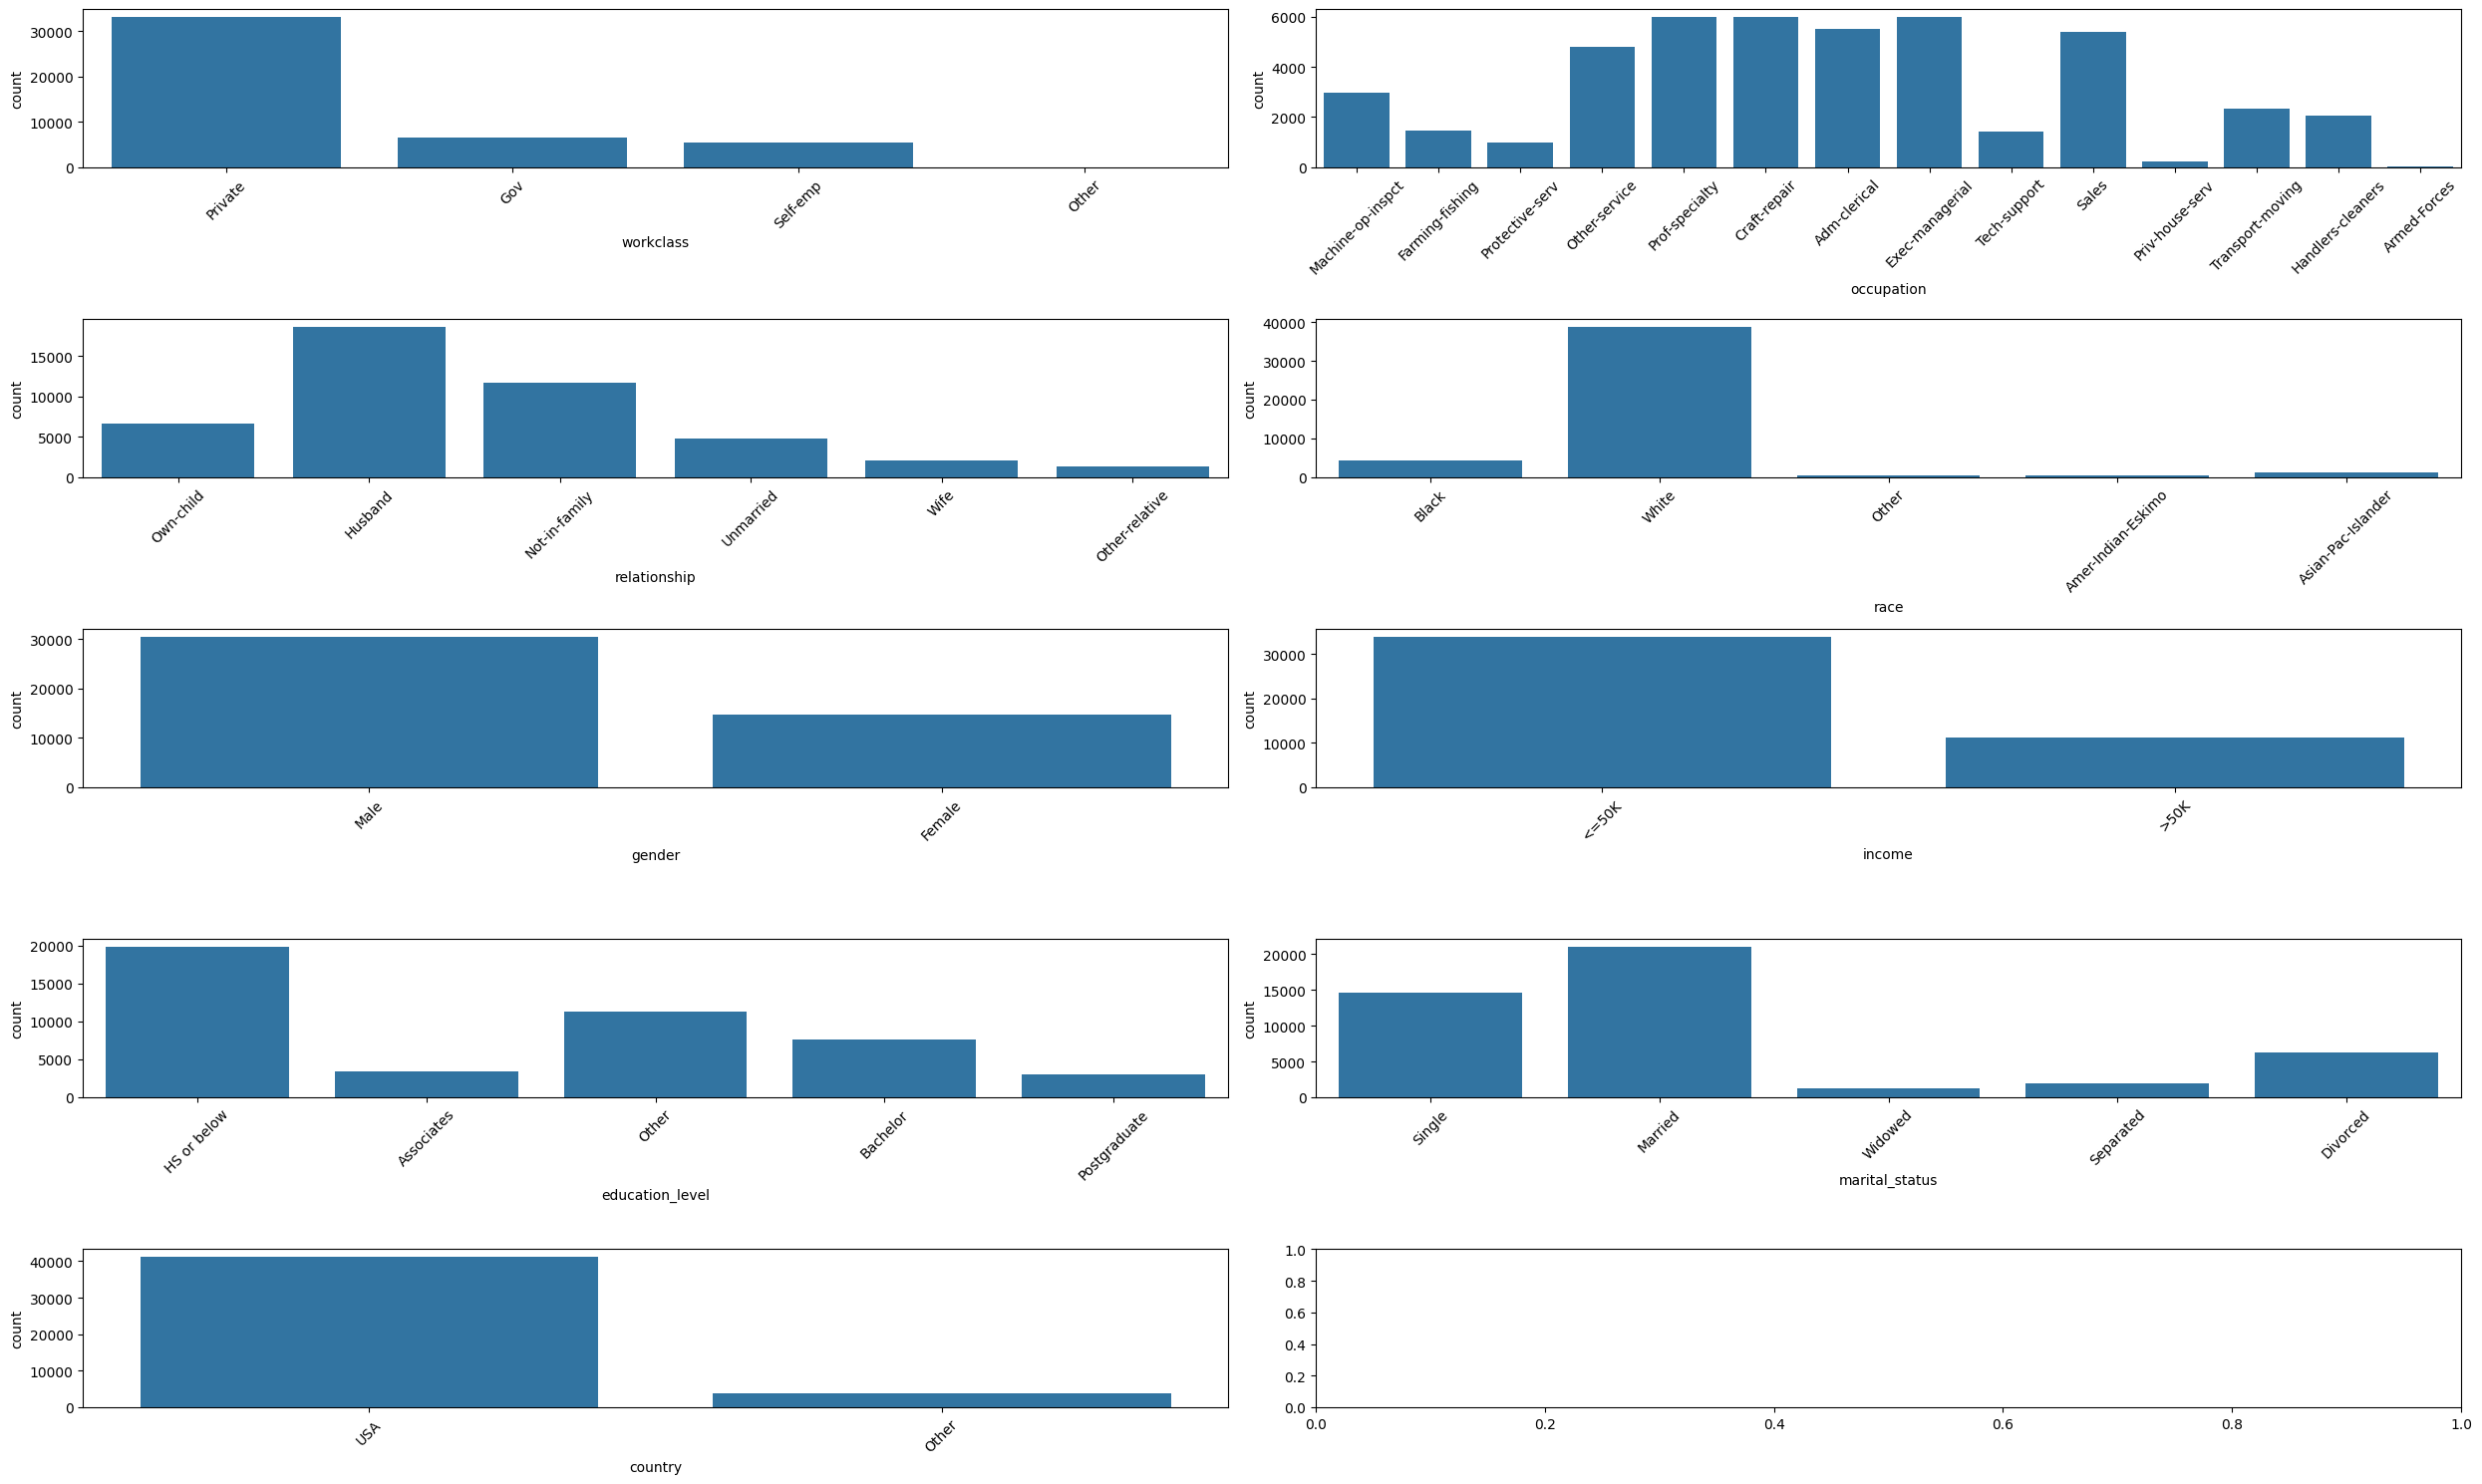

In [204]:
_, axes = plt.subplots(5, 2, figsize=(25, 15))

for ax, col in zip(axes.flatten(), categorical_features):
    sns.countplot(data=df_copy, x=col, ax=ax)
    ax.set_xlabel(col)
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()  # Adjusts the spacing between subplots
plt.show()


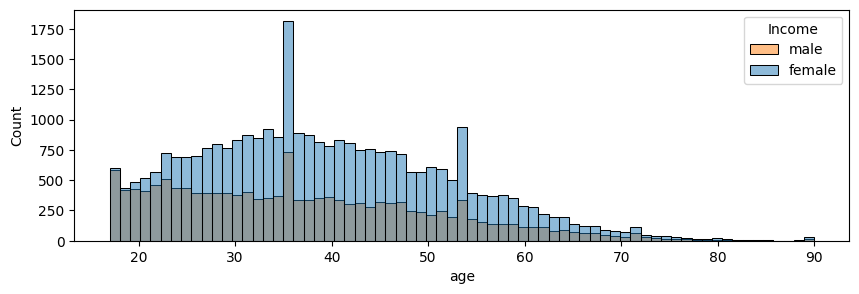

In [205]:
plt.figure(figsize=(10, 3))
sns.histplot(x='age', hue='gender', data =df_copy)
plt.legend(title="Income", labels=["male", "female"])

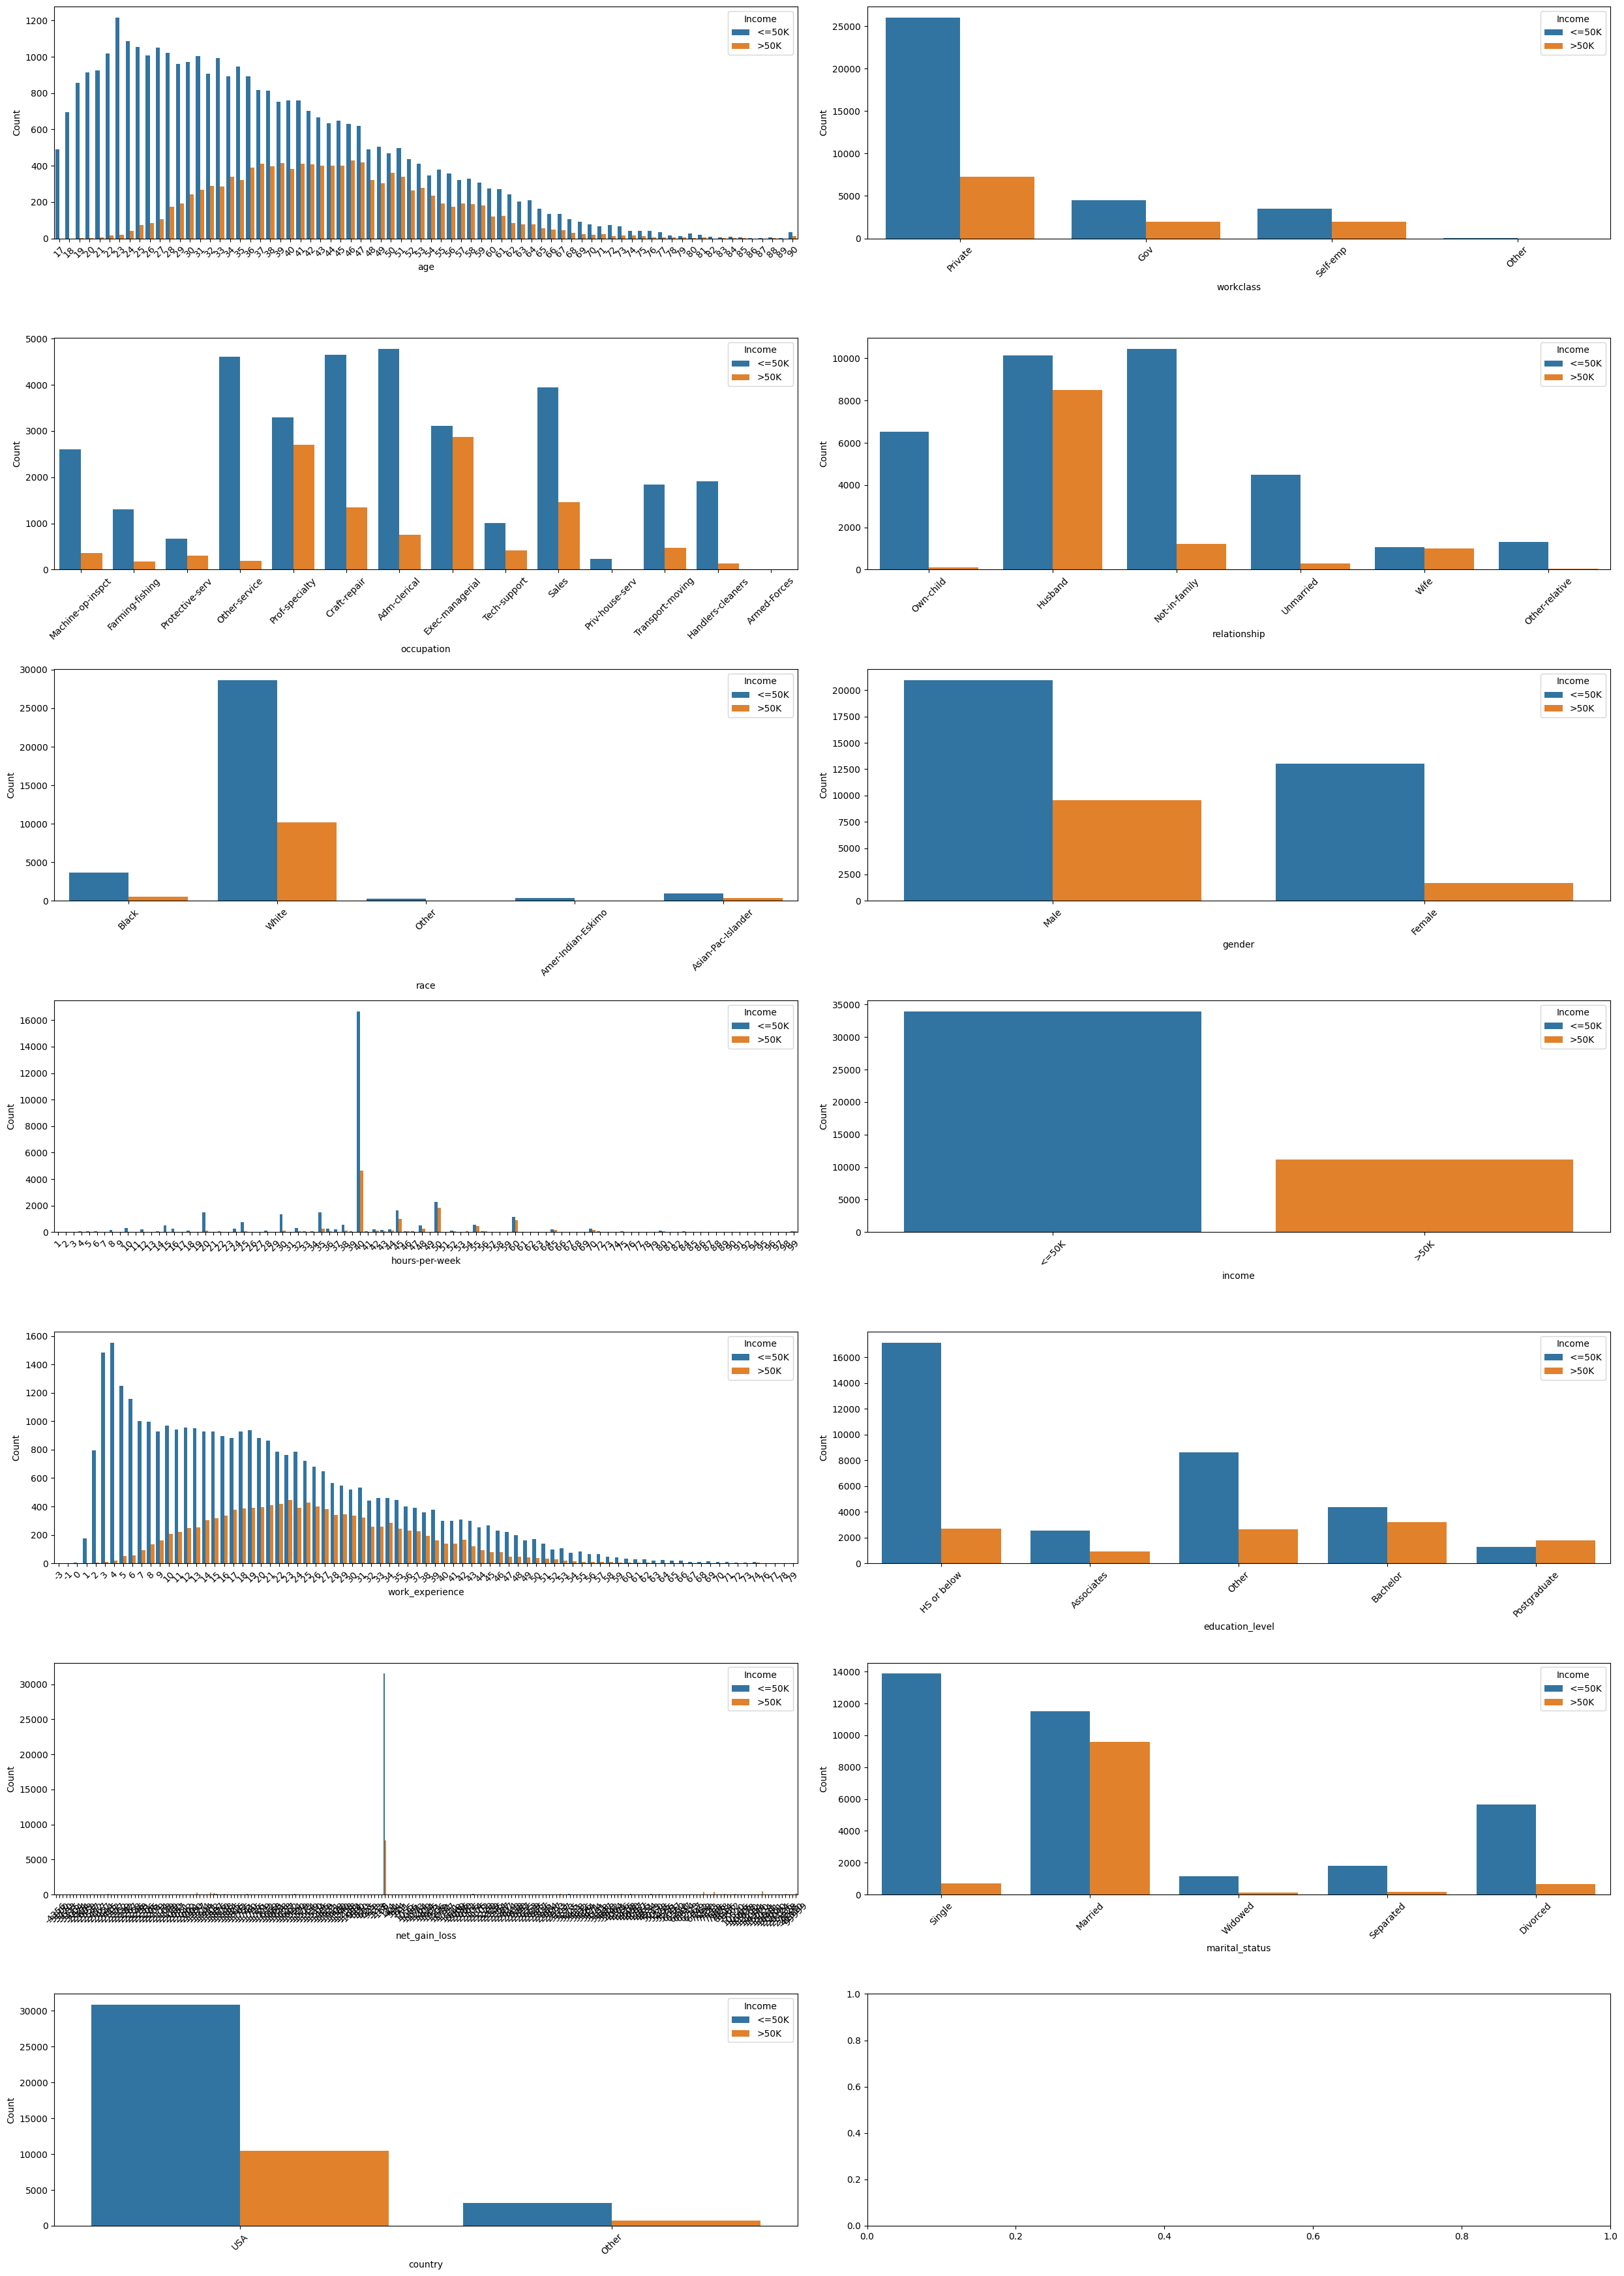

In [206]:
_, axes = plt.subplots(7, 2, figsize=(25, 35))

for ax, col in zip(axes.flatten(), df_copy):
    sns.countplot(data=df_copy, x=col, hue='income', ax=ax)  # Add hue for income categories
    ax.set_xlabel(col)  # Set x-axis label
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylabel('Count')
    ax.legend(title="Income" , labels=["<=50K", ">50K"])

# Adjust layout
plt.tight_layout()
plt.show()

In [18]:
label_encoder = LabelEncoder()
for col in categorical_features:
  df_copy[col] = label_encoder.fit_transform(df_copy[col])

df_copy

,age,workclass,occupation,relationship,race,gender,hours-per-week,income,work_experience,education_level,net_gain_loss,marital_status,country
0,25,2,6,3,2,1,40,0,11,2,0,3,1
1,38,2,4,0,4,1,50,0,22,2,0,1,1
2,28,0,10,0,4,1,40,1,9,0,0,1,1
3,44,2,6,0,2,1,40,1,27,3,7688,1,1
5,34,2,7,1,4,1,30,0,21,2,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,2,12,5,4,0,38,0,8,0,0,1,1
48838,40,2,6,0,4,1,40,1,24,2,0,1,1
48839,58,2,0,4,4,0,40,0,42,2,0,4,1
48840,22,2,0,3,4,1,20,0,6,2,0,3,1


In [19]:
Greater_than_50K = df_copy[df_copy['income'] == 1]
Less_than_50K = df_copy[df_copy['income'] == 0]

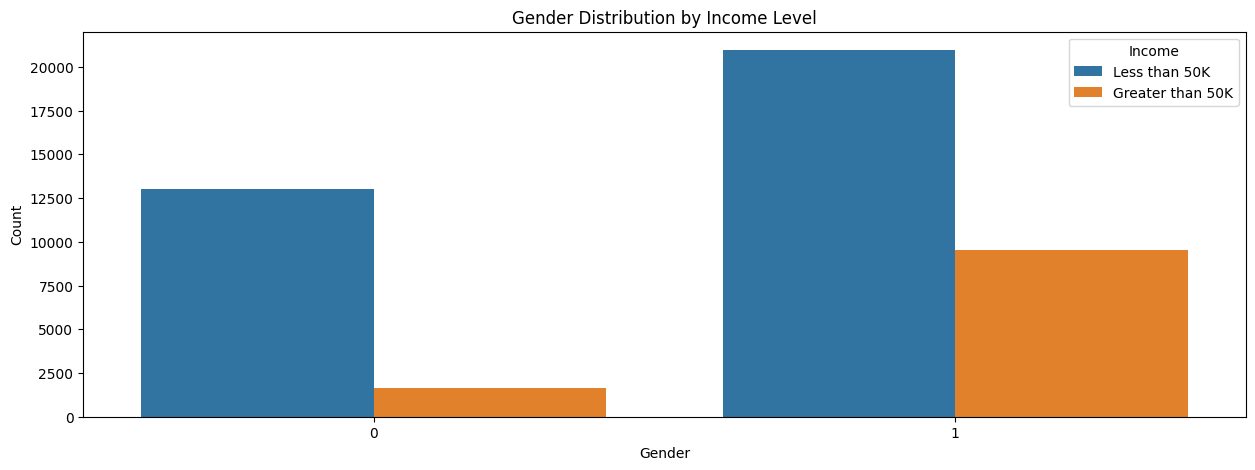

In [19]:
plt.figure(figsize=(15, 5))
sns.countplot(x='gender', hue='income', data=df_copy)
plt.title("Gender Distribution by Income Level")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(title="Income", labels=["Less than 50K", "Greater than 50K"])

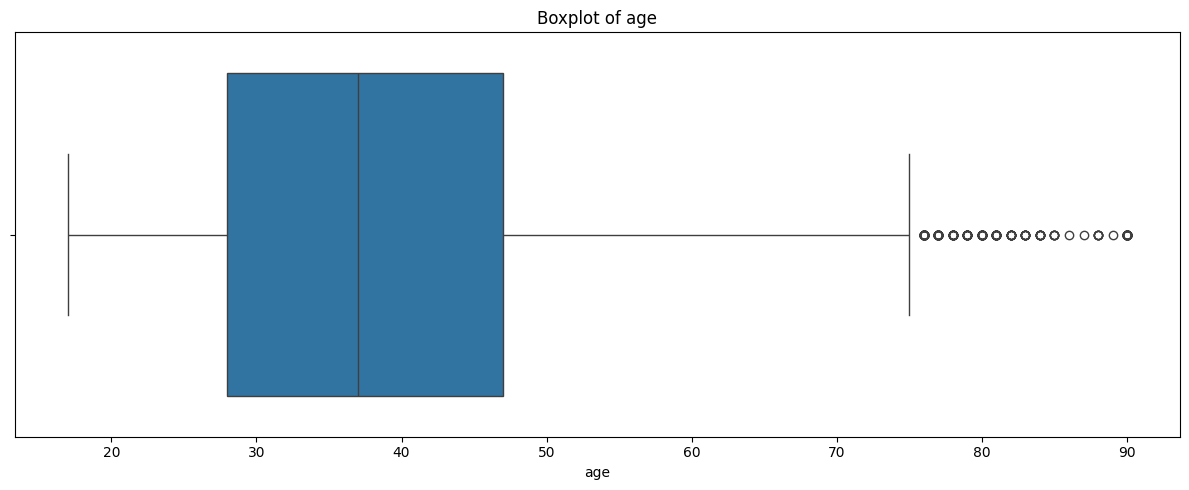

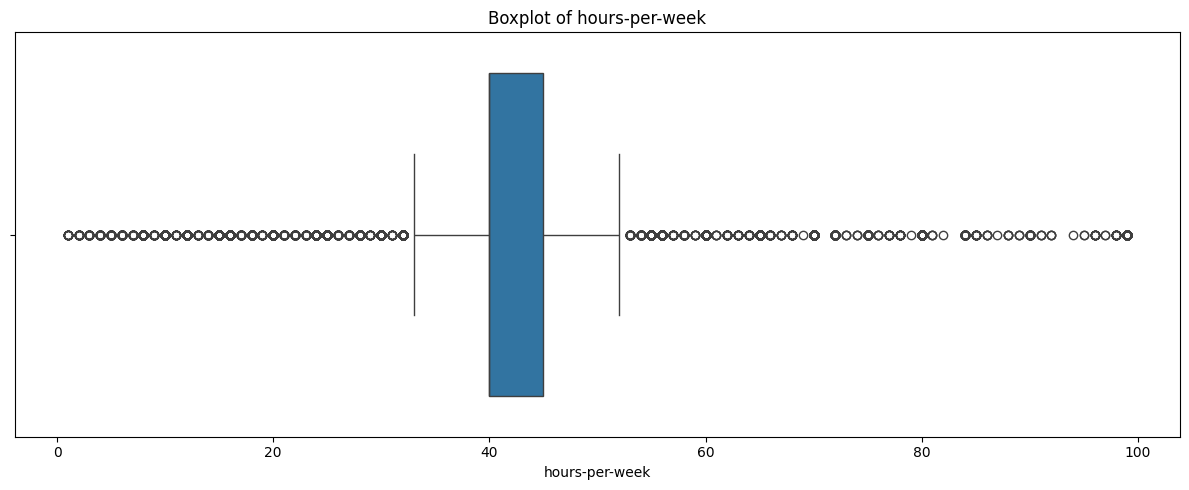

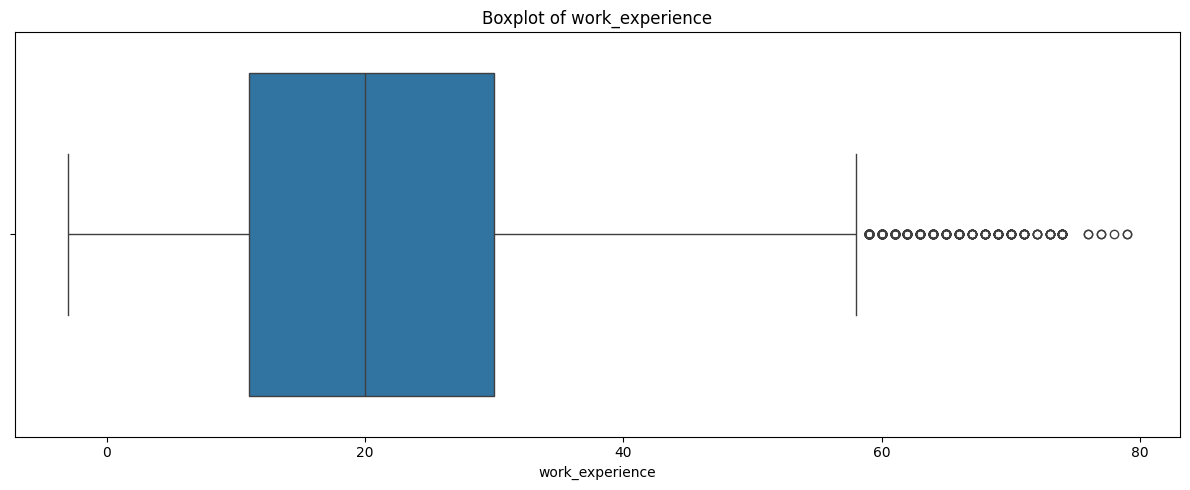

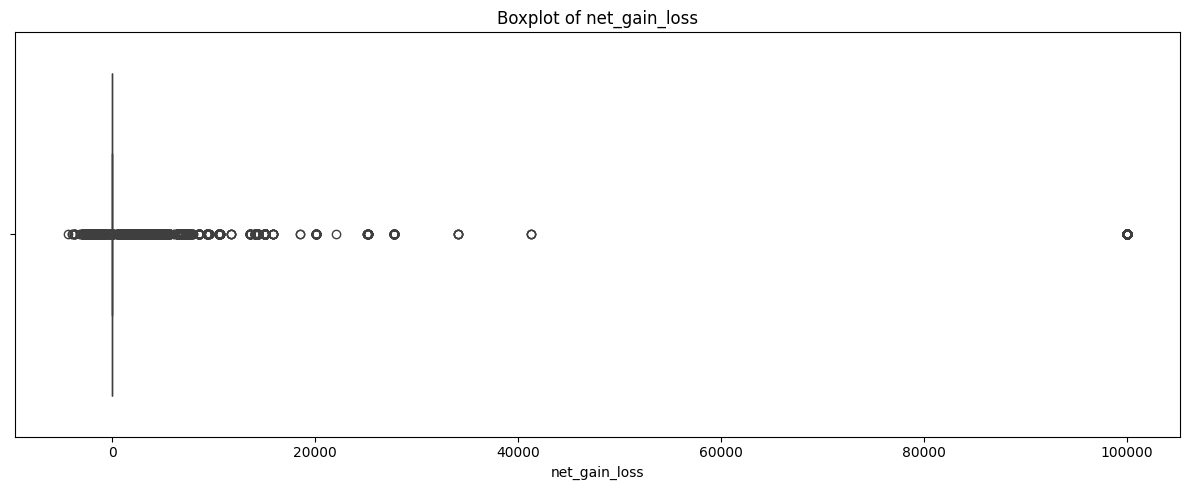

In [210]:
# checking the Outliers
for col in numerical_features:
    plt.figure(figsize=(12, 5))
    sns.boxplot(data=df_copy, x=col)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


<Axes: >

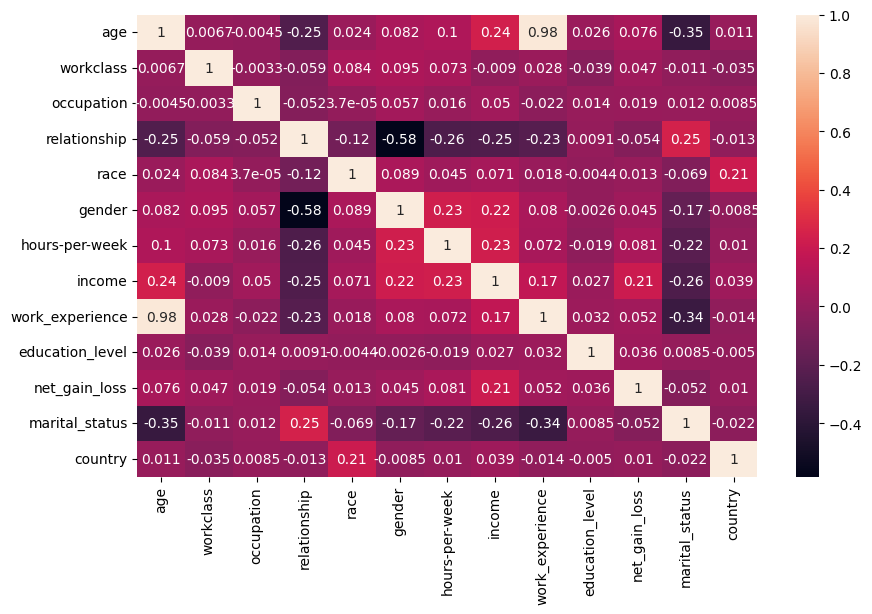

In [29]:
corr = df_copy.corr()
plt.subplots(figsize=(10,6))
sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns, annot=True)

In [212]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45175 entries, 0 to 48841
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              45175 non-null  int64
 1   workclass        45175 non-null  int64
 2   occupation       45175 non-null  int64
 3   relationship     45175 non-null  int64
 4   race             45175 non-null  int64
 5   gender           45175 non-null  int64
 6   hours-per-week   45175 non-null  int64
 7   income           45175 non-null  int64
 8   work_experience  45175 non-null  int64
 9   education_level  45175 non-null  int64
 10  net_gain_loss    45175 non-null  int64
 11  marital_status   45175 non-null  int64
 12  country          45175 non-null  int64
dtypes: int64(13)
memory usage: 4.8 MB


In [20]:
df_copy.columns = df_copy.columns.str.strip()
print (df_copy.columns)

Index(['age', 'workclass', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'income', 'work_experience', 'education_level',
       'net_gain_loss', 'marital_status', 'country'],
      dtype='object')


In [21]:
X=df_copy.drop(columns='income',axis=1)
X.columns

Index(['age', 'workclass', 'occupation', 'relationship', 'race', 'gender',
       'hours-per-week', 'work_experience', 'education_level', 'net_gain_loss',
       'marital_status', 'country'],
      dtype='object')

In [22]:
y = df_copy['income']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [26]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("Original class distribution:")
print(y_train.value_counts())
print("\nAfter applying SMOTE:")
print(y_train_smote.value_counts())

Original class distribution:
income
0    27131
1     9009
Name: count, dtype: int64

After applying SMOTE:
income
0    27131
1    27131
Name: count, dtype: int64


In [24]:
# this sampling give a little bit worse accuracy than the one before
# then we will not going to use it.

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

# Reduce majority class
# majority 50% larger than minority
undersampler = RandomUnderSampler(sampling_strategy=0.5, random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, y_train)

# Balance classes with SMOTE
smote = SMOTE(sampling_strategy=1.0, random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_undersampled, y_undersampled)

# Check distributions
print("Original class distribution:")
print(y_train.value_counts())
print("\nAfter undersampling:")
print(y_undersampled.value_counts())
print("\nAfter oversampling:")
print(y_train_smote.value_counts())


Original class distribution:
income
0    27131
1     9009
Name: count, dtype: int64

After undersampling:
income
0    18018
1     9009
Name: count, dtype: int64

After oversampling:
income
0    18018
1    18018
Name: count, dtype: int64


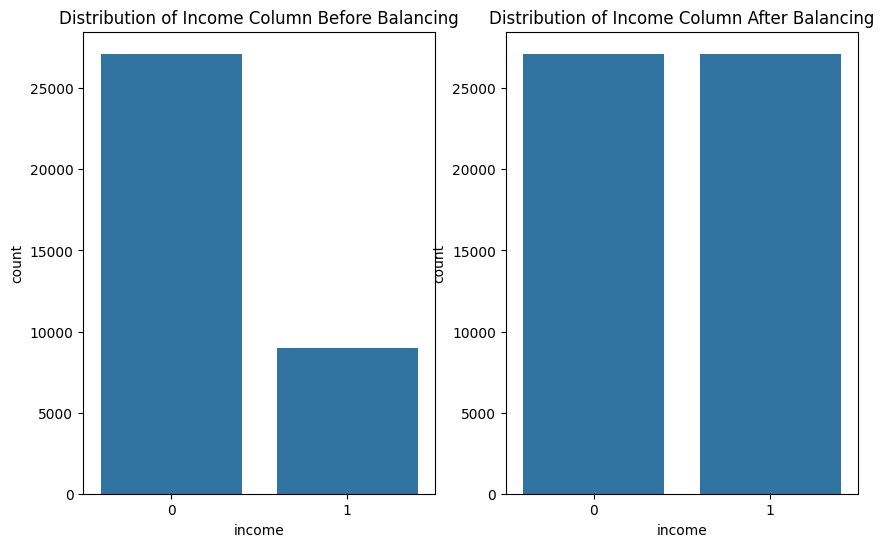

In [344]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.countplot(x=y_train)
plt.title("Distribution of Income Column Before Balancing")
plt.subplot(1,2,2)
sns.countplot(x=y_train_smote)
plt.title("Distribution of Income Column After Balancing")
plt.show()

ML - Model

In [25]:
models = {
  'Logistic': LogisticRegression(max_iter=1000,solver='saga') ,
  'RandomForestC' : RandomForestClassifier()
}

In [26]:
scalers = {
    "None": None,  # no scaling
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

Confusion Matrix for Logistic with None scaler:
[[3729 3113]
 [ 770 1423]]


C:\Users\moham\Desktop\project\Final_Project\venv\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


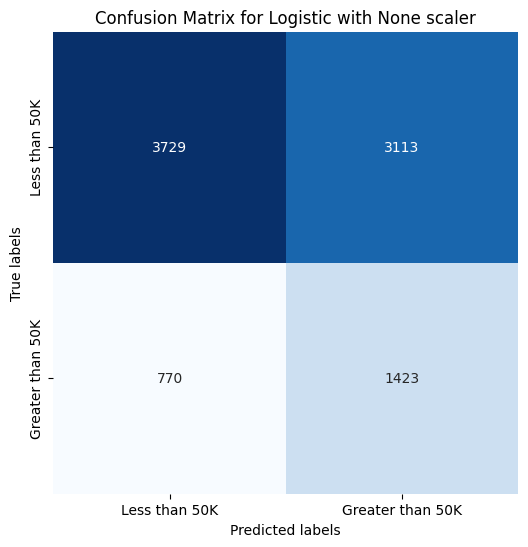

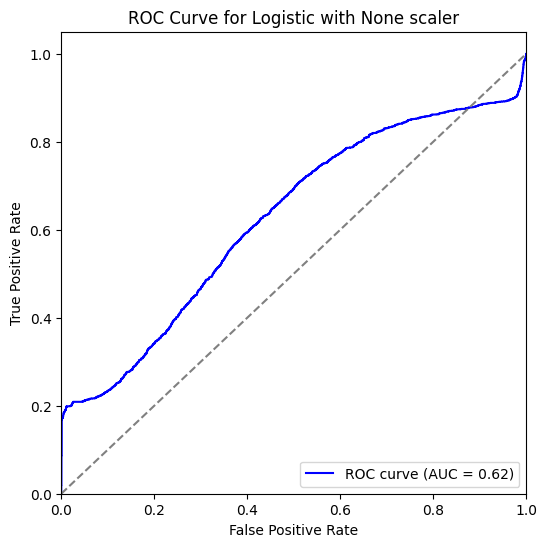

model_name  :  Logistic
scaler  :  None
accuracy  :  0.5702268954067515
Recall  :  0.5702268954067515
Precision  :  0.5702268954067515
f1_score  :  0.5702268954067515
roc_auc  :  0.6236467898376661
****************************************
Confusion Matrix for RandomForestC with None scaler:
[[5790 1052]
 [ 563 1630]]


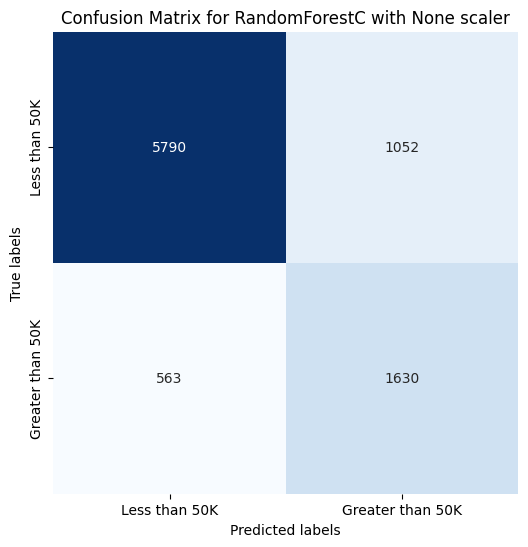

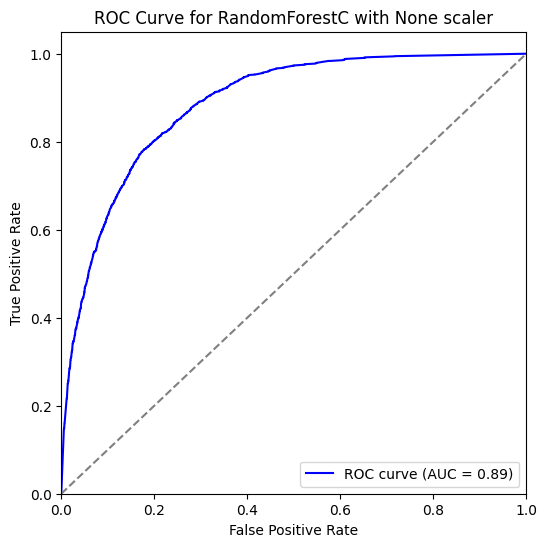

model_name  :  RandomForestC
scaler  :  None
accuracy  :  0.8212506917542889
Recall  :  0.8212506917542889
Precision  :  0.8212506917542889
f1_score  :  0.8212506917542889
roc_auc  :  0.8854312164625747
****************************************
Confusion Matrix for Logistic with MinMaxScaler scaler:
[[4920 1922]
 [ 491 1702]]


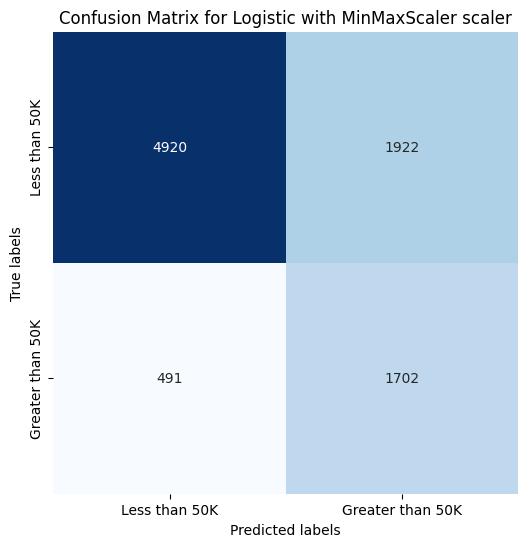

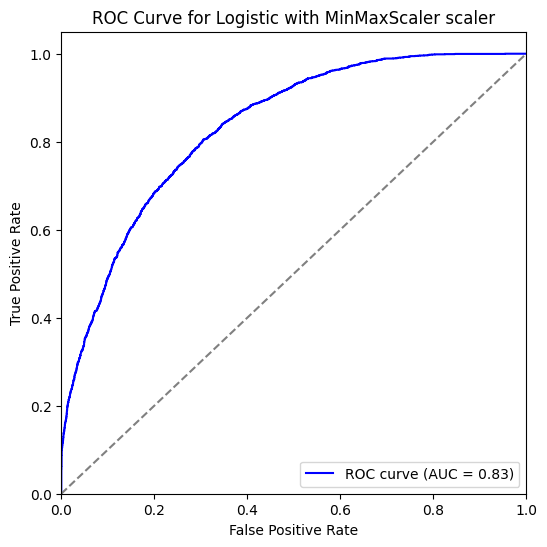

model_name  :  Logistic
scaler  :  MinMaxScaler
accuracy  :  0.7329275041505258
Recall  :  0.7329275041505258
Precision  :  0.7329275041505258
f1_score  :  0.7329275041505258
roc_auc  :  0.8325504351826045
****************************************
Confusion Matrix for RandomForestC with MinMaxScaler scaler:
[[5774 1068]
 [ 568 1625]]


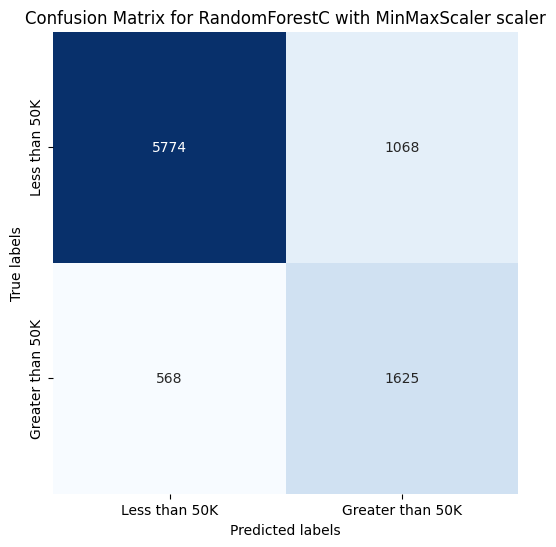

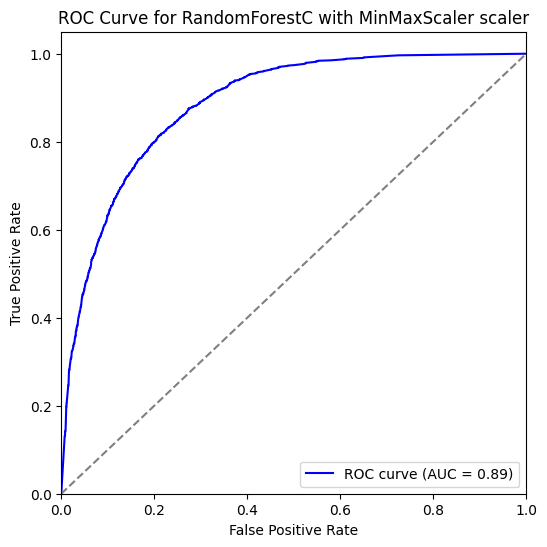

model_name  :  RandomForestC
scaler  :  MinMaxScaler
accuracy  :  0.8189263973436636
Recall  :  0.8189263973436636
Precision  :  0.8189263973436636
f1_score  :  0.8189263973436636
roc_auc  :  0.8856460519260015
****************************************
Confusion Matrix for Logistic with StandardScaler scaler:
[[5075 1767]
 [ 517 1676]]


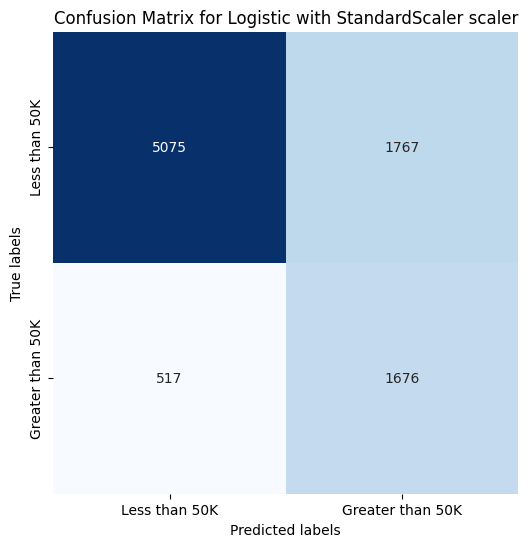

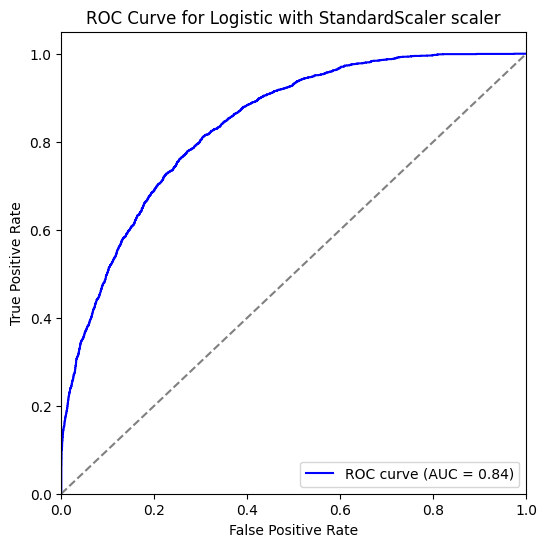

model_name  :  Logistic
scaler  :  StandardScaler
accuracy  :  0.7472053126729385
Recall  :  0.7472053126729385
Precision  :  0.7472053126729385
f1_score  :  0.7472053126729385
roc_auc  :  0.8373266004225663
****************************************
Confusion Matrix for RandomForestC with StandardScaler scaler:
[[5793 1049]
 [ 559 1634]]


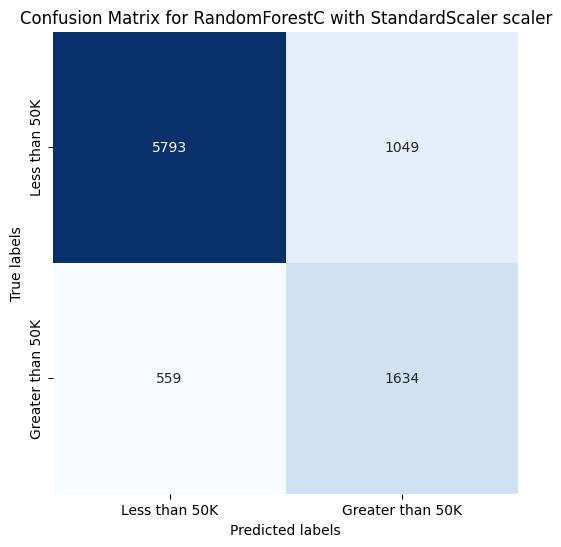

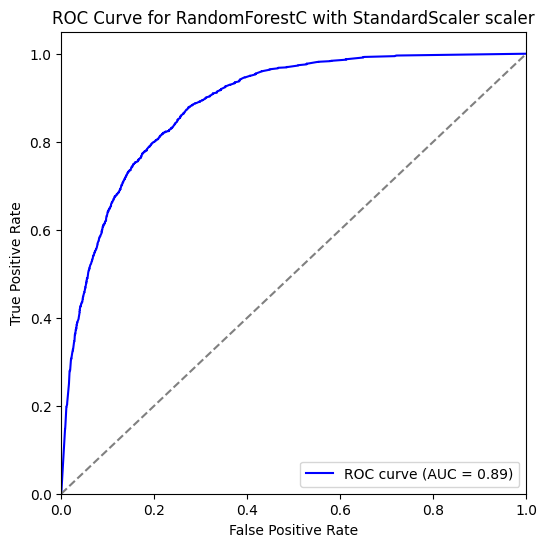

model_name  :  RandomForestC
scaler  :  StandardScaler
accuracy  :  0.8220254565578307
Recall  :  0.8220254565578307
Precision  :  0.8220254565578307
f1_score  :  0.8220254565578307
roc_auc  :  0.8855256214366537
****************************************


,model_name,scaler,accuracy,recall,Precision Score,f1 Score,roc_auc
0,Logistic,None,0.570227,0.570227,0.570227,0.570227,0.623647
1,RandomForestC,None,0.821251,0.821251,0.821251,0.821251,0.885431
2,Logistic,MinMaxScaler,0.732928,0.732928,0.732928,0.732928,0.832550
3,RandomForestC,MinMaxScaler,0.818926,0.818926,0.818926,0.818926,0.885646
4,Logistic,StandardScaler,0.747205,0.747205,0.747205,0.747205,0.837327
5,RandomForestC,StandardScaler,0.822025,0.822025,0.822025,0.822025,0.885526


In [27]:
results_list = []

for scaler_name, scaler in scalers.items(): # loop over scalers and models
    if scaler_name == "None":
        X_train_scaled = X_train_smote
        X_test_scaled = X_test
    else:
        scaler.set_output(transform="pandas")
        X_train_scaled = scaler.fit_transform(X_train_smote)
        X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():

        model.fit(X_train_scaled, y_train_smote) ## train model
        y_pred = model.predict(X_test_scaled) # make predictions

        accuracyscore = accuracy_score(y_test, y_pred)
        recallscore = recall_score(y_test, y_pred,average='micro')
        precisionscore = precision_score(y_test, y_pred,average='micro')
        f1score = f1_score(y_test, y_pred,average='micro')
        
        cm = confusion_matrix(y_test, y_pred)

        # Debug: Print confusion matrix
        print(f"Confusion Matrix for {model_name} with {scaler_name} scaler:\n{cm}")

        # Plot confusion matrix
        plt.figure(figsize=(6, 6))
        sns.heatmap(cm, annot=True, fmt='.4g', cmap='Blues', cbar=False,
                     xticklabels=['Less than 50K', 'Greater than 50K'],
                    yticklabels=['Less than 50K', 'Greater than 50K'])
        plt.title(f'Confusion Matrix for {model_name} with {scaler_name} scaler')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.show()

        # Calculate ROC curve and AUC
        #True Positive Rate (TPR)
        #False Positive Rate (FPR)
        fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
        roc_auc = auc(fpr, tpr)
        model.predict(X_test_scaled)

        # Plot ROC curve
        plt.figure(figsize=(6, 6))
        plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve for {model_name} with {scaler_name} scaler')
        plt.legend(loc='lower right')
        plt.show()

        results_list.append({
            "model_name": model_name,
            "scaler": scaler_name,
            "accuracy": accuracyscore,
            "recall": recallscore,
            'Precision Score':precisionscore,
            'f1 Score' : f1score,
            'roc_auc' : roc_auc
        })


        print("model_name  : ",model_name)
        print("scaler  : ",scaler_name)
        print("accuracy  : ",accuracyscore)
        print("Recall  : ", recallscore)
        print("Precision  : ",precisionscore)
        print("f1_score  : ",f1score)
        print("roc_auc  : ",roc_auc)
        print("****************************************")


results = pd.DataFrame(results_list)
results

In [28]:
# Sort the results DataFrame by 'roc_auc'
sorted_results = results.sort_values(by='roc_auc', ascending=False)
sorted_results.reset_index(drop=True, inplace=True)

sorted_results

,model_name,scaler,accuracy,recall,Precision Score,f1 Score,roc_auc
0,RandomForestC,MinMaxScaler,0.818926,0.818926,0.818926,0.818926,0.885646
1,RandomForestC,StandardScaler,0.822025,0.822025,0.822025,0.822025,0.885526
2,RandomForestC,None,0.821251,0.821251,0.821251,0.821251,0.885431
3,Logistic,StandardScaler,0.747205,0.747205,0.747205,0.747205,0.837327
4,Logistic,MinMaxScaler,0.732928,0.732928,0.732928,0.732928,0.832550
5,Logistic,None,0.570227,0.570227,0.570227,0.570227,0.623647


Hyperparameter tuning--> RandomizedSearchCV

In [31]:
rand_forc = RandomForestClassifier()
scaler = StandardScaler()


scaler.set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)


rand_forc.fit(X_train_scaled, y_train_smote)  # Train the model
y_pred_rand_f = rand_forc.predict(X_test_scaled)  # Make predictions

# Calculate the ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
roc_auc_before = auc(fpr, tpr)

accuracyscore_before = accuracy_score(y_test, y_pred_rand_f)
recallscore_before = recall_score(y_test, y_pred_rand_f, average='micro')
precisionscore_before = precision_score(y_test, y_pred_rand_f, average='micro')
f1score_before = f1_score(y_test, y_pred_rand_f, average='micro')


print("Before applying hyperparameter tuning")
print("Accuracy: ", accuracyscore_before)
print("Recall: ", recallscore_before)
print("Precision: ", precisionscore_before)
print("F1 Score: ", f1score_before)
print("ROC AUC: ", roc_auc_before)

# Hyperparameter tuning--> RandomizedSearchCV
param_dist = {
    'n_estimators': np.arange(50, 300, 50),  # number of trees in the forest
    'max_depth': np.arange(5, 20, 5),  # maximum depth of the trees
    'max_leaf_nodes': [3, 6, 9, 12],
    'max_features': ['sqrt', 'log2', None],
    'min_samples_split': [2, 5, 10],  # minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # minimum number of samples required at a leaf node
    'bootstrap': [True, False],  # whether to bootstrap samples when building trees
}

random_search = RandomizedSearchCV(estimator=rand_forc, param_distributions=param_dist,
                                   n_iter=3, cv=2, random_state=42, n_jobs=-1)

random_search.fit(X_train_scaled, y_train_smote)

# print parameters for best model after tuning
print(f"\n\nBest Parameters: {random_search.best_params_}")

best_rf = random_search.best_estimator_

#  predictions with  best model
y_predrf = best_rf.predict(X_test_scaled)

# Calculate the ROC curve and AUC for the best model
fpr, tpr, thresholds = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_after = auc(fpr, tpr)

# Calculate other evaluation metrics for the best model
accuracyscore_after = accuracy_score(y_test, y_predrf)
recallscore_after = recall_score(y_test, y_predrf, average='micro')
precisionscore_after = precision_score(y_test, y_predrf, average='micro')
f1score_after = f1_score(y_test, y_predrf, average='micro')

# Print results after hyperparameter tuning
print("After applying hyperparameter tuning")
print("Accuracy: ", accuracyscore_after)
print("Recall: ", recallscore_after)
print("Precision: ", precisionscore_after)
print("F1 Score: ", f1score_after)
print("ROC AUC: ", roc_auc_after)


Before applying hyperparameter tuning
Accuracy:  0.8180409518539015
Recall:  0.8180409518539015
Precision:  0.8180409518539015
F1 Score:  0.8180409518539015
ROC AUC:  0.8855256214366537


Best Parameters: {'n_estimators': np.int64(50), 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_leaf_nodes': 12, 'max_features': 'log2', 'max_depth': np.int64(10), 'bootstrap': True}
After applying hyperparameter tuning
Accuracy:  0.7505257332595462
Recall:  0.7505257332595462
Precision:  0.7505257332595462
F1 Score:  0.7505257332595462
ROC AUC:  0.8804141902439173


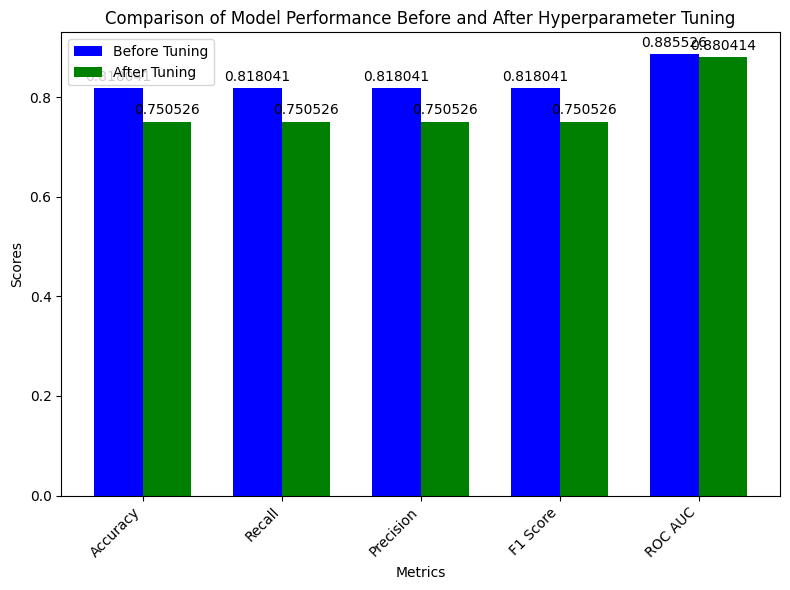

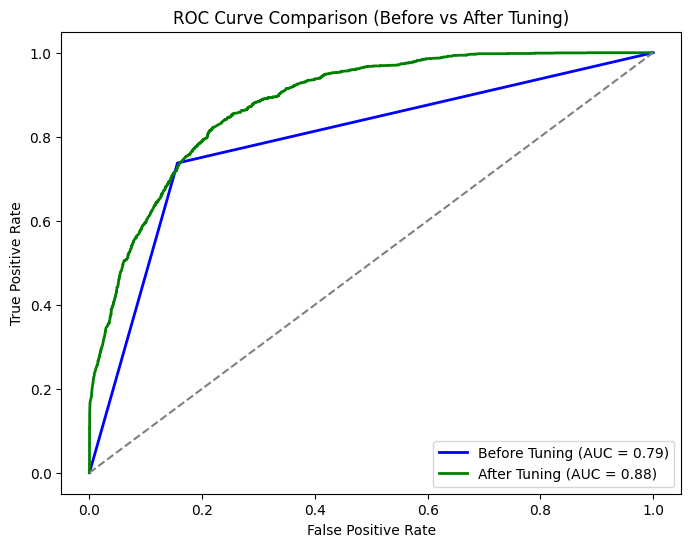

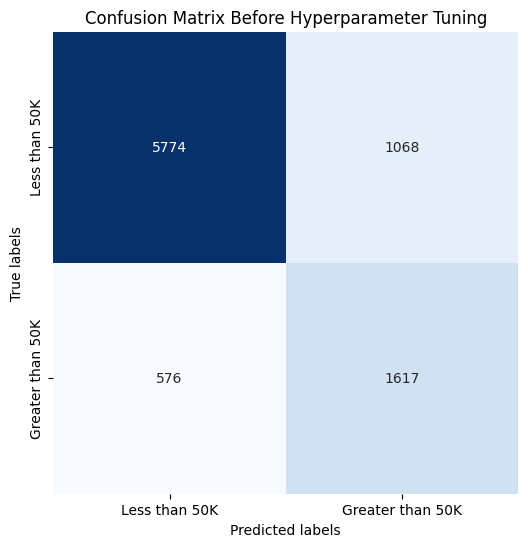

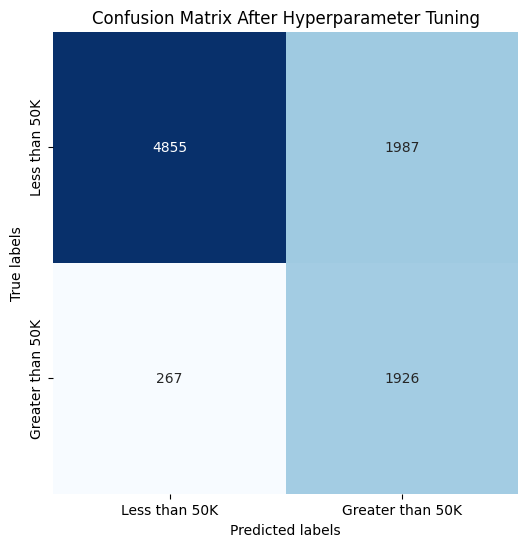

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc

# Assuming metrics are dynamically updated
metrics_before = {
    "Accuracy": accuracyscore_before,  # example value, set dynamically
    "Recall": recallscore_before,      # example value, set dynamically
    "Precision": precisionscore_before,  # example value, set dynamically
    "F1 Score": f1score_before,        # example value, set dynamically
    "ROC AUC": roc_auc_before         # example value, set dynamically
}

metrics_after = {
    "Accuracy": accuracyscore_after,   # example value, set dynamically
    "Recall": recallscore_after,       # example value, set dynamically
    "Precision": precisionscore_after,  # example value, set dynamically
    "F1 Score": f1score_after,         # example value, set dynamically
    "ROC AUC": roc_auc_after          # example value, set dynamically
}

# Plotting the comparison of metrics before and after hyperparameter tuning
labels = list(metrics_before.keys())
before_tuning = [metrics_before[metric] for metric in labels]
after_tuning = [metrics_after[metric] for metric in labels]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8, 6))
rects1 = ax.bar(x - width/2, before_tuning, width, label='Before Tuning', color='b')
rects2 = ax.bar(x + width/2, after_tuning, width, label='After Tuning', color='g')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance Before and After Hyperparameter Tuning')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.legend()

# Labeling bars
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

# Show the bar chart
plt.show()

# Now plotting the ROC curves
# ROC for before hyperparameter tuning
fpr_before, tpr_before, _ = roc_curve(y_test, y_pred_rand_f)
roc_auc_before = auc(fpr_before, tpr_before)

# ROC for after hyperparameter tuning
fpr_after, tpr_after, _ = roc_curve(y_test, best_rf.predict_proba(X_test_scaled)[:, 1])
roc_auc_after = auc(fpr_after, tpr_after)

# ROC curve comparison
plt.figure(figsize=(8, 6))
plt.plot(fpr_before, tpr_before, color='blue', lw=2, label=f'Before Tuning (AUC = {roc_auc_before:.2f})')
plt.plot(fpr_after, tpr_after, color='green', lw=2, label=f'After Tuning (AUC = {roc_auc_after:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line representing random guesses
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (Before vs After Tuning)')
plt.legend(loc='lower right')

# Show the ROC curve plot
plt.show()

# Optionally, we could also visualize confusion matrices before and after tuning for better insight

# Confusion Matrix Visualization - Before Tuning
cm_before = confusion_matrix(y_test, y_pred_rand_f)
plt.figure(figsize=(6, 6))
sns.heatmap(cm_before, annot=True, fmt='.4g', cmap='Blues', cbar=False,
            xticklabels=['Less than 50K', 'Greater than 50K'],
            yticklabels=['Less than 50K', 'Greater than 50K'])
plt.title('Confusion Matrix Before Hyperparameter Tuning')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Confusion Matrix Visualization - After Tuning
cm_after = confusion_matrix(y_test, best_rf.predict(X_test_scaled))
plt.figure(figsize=(6, 6))
sns.heatmap(cm_after, annot=True, fmt='.4g', cmap='Blues', cbar=False,
            xticklabels=['Less than 50K', 'Greater than 50K'],
            yticklabels=['Less than 50K', 'Greater than 50K'])
plt.title('Confusion Matrix After Hyperparameter Tuning')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


Deep Learning

In [26]:
X_train_smote.shape[1]

12

Deep Learning

In [39]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_smote.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Single neuron for binary classification

C:\Users\moham\Desktop\project\Final_Project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [40]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [41]:
# model.fit(X_train_smote, y_train_smote_oh, epochs=10, batch_size=32, validation_split=0.2)
model.fit(X_train_smote, y_train_smote, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6803 - loss: 5.1171 - val_accuracy: 0.2181 - val_loss: 3.1355
Epoch 2/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.7206 - loss: 1.5092 - val_accuracy: 0.5450 - val_loss: 0.8502
Epoch 3/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 993us/step - accuracy: 0.7318 - loss: 1.4110 - val_accuracy: 0.5792 - val_loss: 0.8106
Epoch 4/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7482 - loss: 1.1844 - val_accuracy: 0.6980 - val_loss: 0.8154
Epoch 5/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7601 - loss: 0.8630 - val_accuracy: 0.4571 - val_loss: 1.1300
Epoch 6/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 989us/step - accuracy: 0.7735 - loss: 0.8753 - val_accuracy: 0.7471 - val_loss: 0.4660
Epoch 7/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7808 - loss: 0.8460 - val_accuracy: 0.6443 - val_loss: 0.6650
Epoch 8/15
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.7841 - loss: 0.5407 - val_accu

In [34]:
y_hat = model.predict(X_test)
y_hat

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step


array([[3.51555063e-04],
       [3.13080549e-01],
       [2.01421469e-01],
       ...,
       [6.12868704e-02],
       [1.11605816e-01],
       [3.98038417e-01]], dtype=float32)

In [35]:
# Threshold at 0.5 for class labels
y_hat_binary_trial1 = (y_hat > 0.5).astype(int) # (> 0.5) ---> positive class (1) , (< 0.5) ---> Predict class  (0)

accuracy = accuracy_score(y_test, y_hat_binary_trial1)
print("Accuracy:", accuracy)

Accuracy: 0.813503043718871


more adjustment + Callbacks

In [139]:
# Define early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # monitor validation loss
    patience=5,         # stop after 5 epochs of no improvement
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitor validation loss
    factor=0.5,          # Reduce learning rate by half
    patience=5,          # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1            # Print a message when the learning rate is reduced
)

In [140]:
model.fit(X_train_smote, y_train_smote, epochs=20, batch_size=32, validation_split=0.15, callbacks=[early_stopping, reduce_lr])

Epoch 1/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6841 - loss: 4.1146 - val_accuracy: 0.5052 - val_loss: 0.9996 - learning_rate: 0.0010
Epoch 2/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 985us/step - accuracy: 0.7369 - loss: 0.9375 - val_accuracy: 0.6363 - val_loss: 0.5697 - learning_rate: 0.0010
Epoch 3/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7410 - loss: 1.2120 - val_accuracy: 0.7321 - val_loss: 1.2763 - learning_rate: 0.0010
Epoch 4/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7613 - loss: 1.3875 - val_accuracy: 0.7919 - val_loss: 0.5031 - learning_rate: 0.0010
Epoch 5/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7722 - loss: 0.8066 - val_accuracy: 0.6347 - val_loss: 0.5930 - learning_rate: 0.0010
Epoch 6/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7754 - loss: 1.0799 - val_accuracy: 0.6926 - val_loss: 3.0212 - learning_rate: 0.0010
Epoch 7/20
958/958 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7817 - loss: 0.6514 

In [141]:
y_hat_2 = model.predict(X_test)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 617us/step


In [142]:
y_hat_2

array([[3.9880056e-04],
       [5.1878011e-01],
       [1.5886767e-01],
       ...,
       [2.3901398e-01],
       [2.1743286e-01],
       [5.3178680e-01]], dtype=float32)

In [145]:
# Threshold at 0.5 for class labels
y_hat_binary_trial2 = (y_hat_2 > 0.5).astype(int) # (> 0.5) ---> positive class (1) , (< 0.5) ---> Predict class  (0)

accuracy = accuracy_score(y_test, y_hat_binary_trial2)
print("Accuracy:", accuracy)

Accuracy: 0.7918096292197012


Accuracy: 0.7918
Precision: 0.5466
Recall: 0.8345
F1-Score: 0.6605


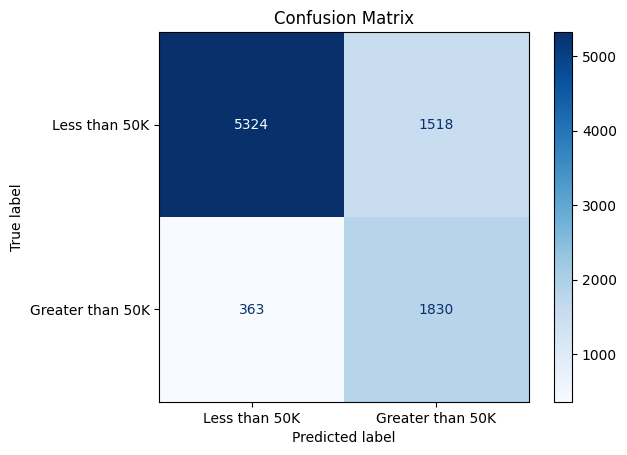

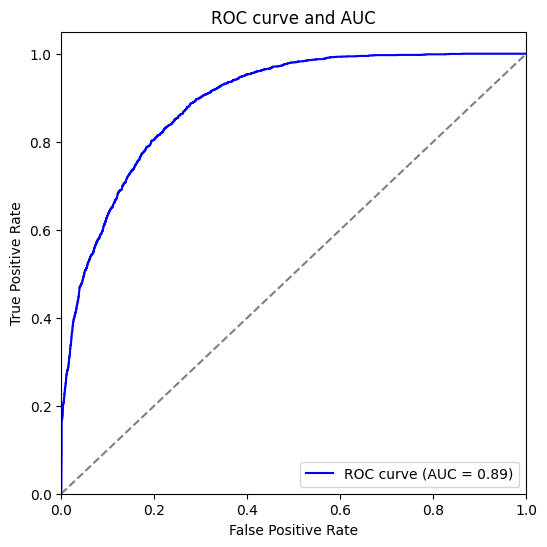

In [147]:
# Calculate metrics
accuracy_without_KerasTuner = accuracy_score(y_test, y_hat_binary_trial2)
precision_without_KerasTuner = precision_score(y_test, y_hat_binary_trial2)
recall_without_KerasTuner = recall_score(y_test, y_hat_binary_trial2)
f1_without_KerasTuner = f1_score(y_test, y_hat_binary_trial2)

print(f"Accuracy: {accuracy_without_KerasTuner:.4f}")
print(f"Precision: {precision_without_KerasTuner:.4f}")
print(f"Recall: {recall_without_KerasTuner:.4f}")
print(f"F1-Score: {f1_without_KerasTuner:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat_binary_trial2)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Less than 50K', 'Greater than 50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()


# Calculate ROC curve and AUC
#True Positive Rate (TPR)
#False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_hat)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc='lower right')
plt.show()


keras_tuner

In [46]:
def build_model(hp):
    model = Sequential()
    # input layer + first hidden layer
    model.add(Dense(
        units=hp.Int('units_1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train_smote.shape[1],)
    ))

    # hidden layers
    for i in range(hp.Int('num_layers', 1, 3)):  # Tuning the number of hidden layers
        model.add(Dense(
            units=hp.Int(f'units_{i+2}', min_value=32, max_value=256, step=32),  # Tuning the number of units
            activation='relu'
        ))

    # Output layer
    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),  # Tuning learning rate
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [47]:
tuner = kt.RandomSearch(
    build_model,                         # Function to build the model
    objective='val_accuracy',            # We want to maximize validation accuracy
    max_trials=10,                       # Search for 10 different models
    executions_per_trial=1,              # Only 1 model training per trial
    directory='tuning_results',          # Where to store tuning results
    project_name='hyperparameter_tuning' # Project name
)

Reloading Tuner from tuning_results\hyperparameter_tuning\tuner0.json


In [48]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [49]:
tuner.search(X_train_smote, y_train_smote, epochs=20, validation_split=0.2, callbacks=[early_stopping])

In [50]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best number of hidden layers: {best_hps.get('num_layers')}")
print(f"Best number of units in first layer: {best_hps.get('units_1')}")
print(f"Best learning rate: {best_hps.get('learning_rate')}")

Best number of hidden layers: 2
Best number of units in first layer: 224
Best learning rate: 0.01


In [51]:
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train_smote, y_train_smote, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20


C:\Users\moham\Desktop\project\Final_Project\venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


901/901 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6480 - loss: 9.2660 - val_accuracy: 0.8778 - val_loss: 0.5388
Epoch 2/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7461 - loss: 0.5133 - val_accuracy: 0.7193 - val_loss: 0.6435
Epoch 3/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7530 - loss: 0.5043 - val_accuracy: 0.6855 - val_loss: 0.6285
Epoch 4/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7660 - loss: 0.4659 - val_accuracy: 0.8867 - val_loss: 0.4350
Epoch 5/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7724 - loss: 0.4632 - val_accuracy: 0.8436 - val_loss: 0.4919
Epoch 6/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7759 - loss: 0.4565 - val_accuracy: 0.7589 - val_loss: 0.5604
Epoch 7/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7736 - loss: 0.4599 - val_accuracy: 0.8941 - val_loss: 0.4099
Epoch 8/20
901/901 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7802 - loss: 0.4528 - val_accuracy: 0.6462 - val_

In [52]:
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7617 - loss: 0.4504
Test Accuracy: 0.7547315955162048


In [53]:
# Make predictions (probabilities)
y_hat_with_KerasTuner = best_model.predict(X_test)
y_hat_binary_trail3 = (y_hat_with_KerasTuner > 0.5).astype(int)

283/283 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step


In [54]:
accuracy = accuracy_score(y_test, y_hat_binary_trail3)
print("Accuracy:", accuracy)

Accuracy: 0.7547315993359159


Evaluation

Accuracy: 0.7547
Precision: 0.4969
Recall: 0.8463
F1-Score: 0.6262


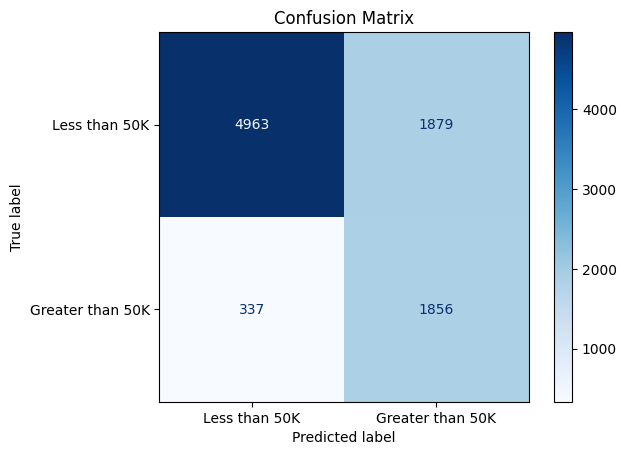

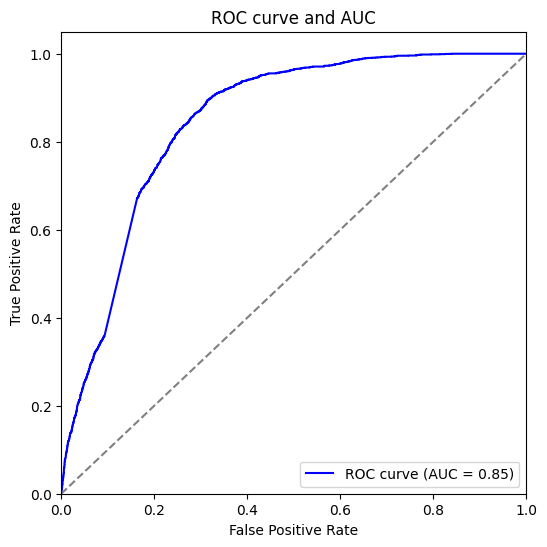

In [55]:
# Calculate metrics
accuracy_with_KerasTuner = accuracy_score(y_test, y_hat_binary_trail3)
precision_with_KerasTuner = precision_score(y_test, y_hat_binary_trail3)
recall_with_KerasTuner = recall_score(y_test, y_hat_binary_trail3)
f1_with_KerasTuner = f1_score(y_test, y_hat_binary_trail3)

print(f"Accuracy: {accuracy_with_KerasTuner:.4f}")
print(f"Precision: {precision_with_KerasTuner:.4f}")
print(f"Recall: {recall_with_KerasTuner:.4f}")
print(f"F1-Score: {f1_with_KerasTuner:.4f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_hat_binary_trail3)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Less than 50K', 'Greater than 50K'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve and AUC
#True Positive Rate (TPR)
#False Positive Rate (FPR)
fpr, tpr, thresholds = roc_curve(y_test, y_hat_with_KerasTuner)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve and AUC')
plt.legend(loc='lower right')
plt.show()

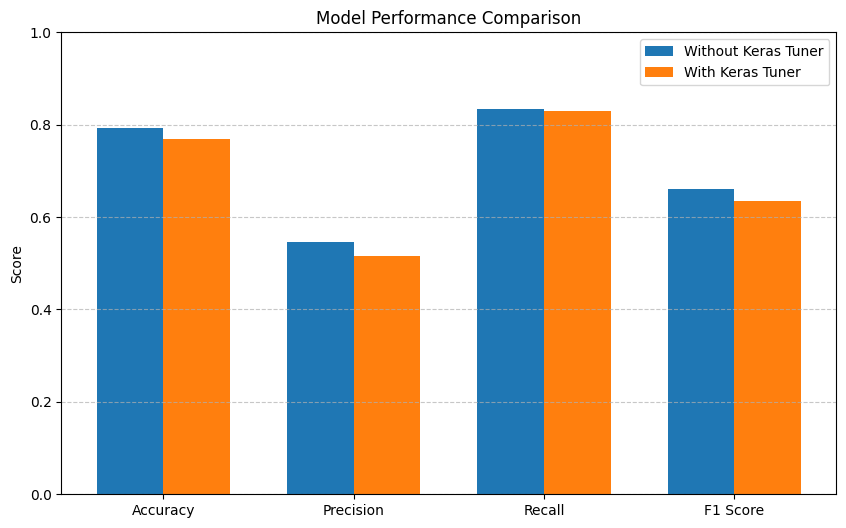

In [156]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
without_keras_tuner = [
    accuracy_without_KerasTuner,
    precision_without_KerasTuner,
    recall_without_KerasTuner,
    f1_without_KerasTuner,
]
with_keras_tuner = [
    accuracy_with_KerasTuner,
    precision_with_KerasTuner,
    recall_with_KerasTuner,
    f1_with_KerasTuner,
]

x = np.arange(len(metrics))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, without_keras_tuner, width, label='Without Keras Tuner')
plt.bar(x + width/2, with_keras_tuner, width, label='With Keras Tuner')

# Formatting
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim([0, 1])  # Metric scores are between 0 and 1
plt.title('Model Performance Comparison')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The "Without Keras Tuner" model has slightly higher Accuracy, Recall, and F1 scores compared to the "With Keras Tuner" model.

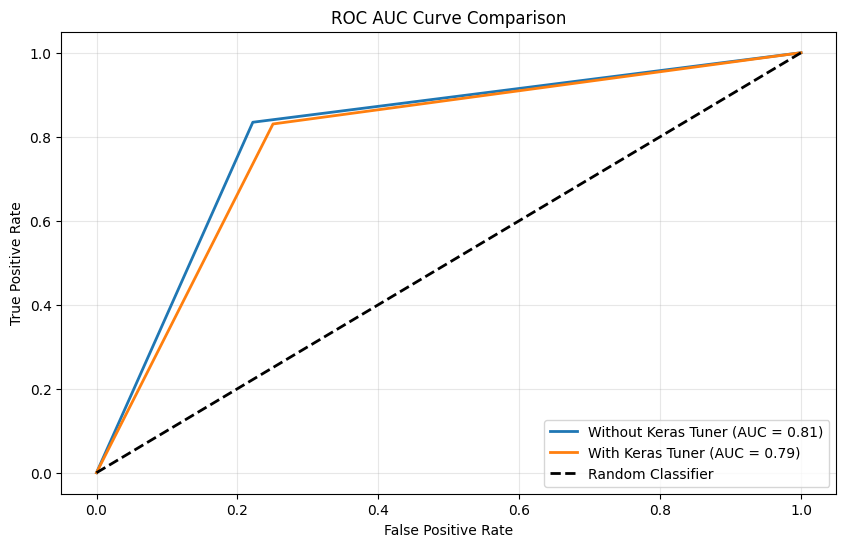

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_without, tpr_without, _ = roc_curve(y_test, y_hat_binary_trial2)
roc_auc_without = auc(fpr_without, tpr_without)

fpr_with, tpr_with, _ = roc_curve(y_test, y_hat_binary_trail3)
roc_auc_with = auc(fpr_with, tpr_with)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_without, tpr_without, label=f'Without Keras Tuner (AUC = {roc_auc_without:.2f})', linewidth=2)
plt.plot(fpr_with, tpr_with, label=f'With Keras Tuner (AUC = {roc_auc_with:.2f})', linewidth=2)

# Baseline
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')

# Formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


The ROC AUC score indicates the overall ability of the model to distinguish between classes. While both models perform well, the "Without Keras Tuner" model shows slightly better discrimination.
With tuner better

The "Without Keras Tuner" model is better overall. It has higher Recall, F1 Score, and ROC AUC, which are important metrics when balancing the model's ability to identify true positives and minimize false positives/negatives.

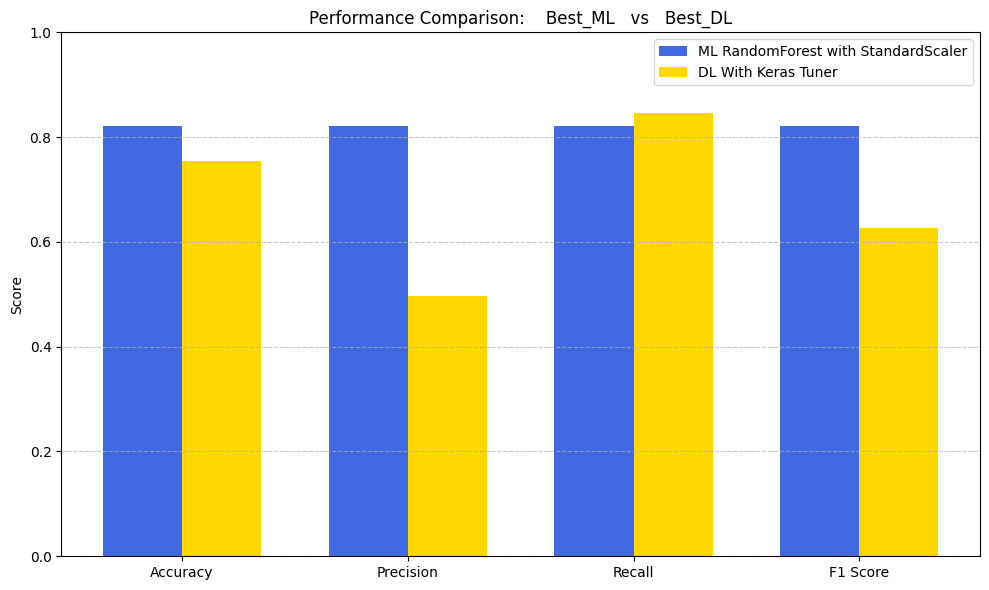

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Extract the relevant data for RandomForestC with StandardScaler
rf_standard_scaler_metrics = ['accuracy', 'Precision Score', 'recall', 'f1 Score']
rf_standard_scaler_values = sorted_results[(sorted_results['model_name'] == 'RandomForestC') & 
                                           (sorted_results['scaler'] == 'StandardScaler')][rf_standard_scaler_metrics].iloc[0].values

# Define the metrics for the x-axis
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Data for with_keras_tuner (replace with actual values if needed)
DL_with_keras_tuner = [
    accuracy_with_KerasTuner,
    precision_with_KerasTuner,
    recall_with_KerasTuner,
    f1_with_KerasTuner,
]

# X axis locations
x = np.arange(len(metrics))
width = 0.35

# Plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_standard_scaler_values, width, label='ML RandomForest with StandardScaler', color='#4169E1')
plt.bar(x + width/2, with_keras_tuner, width, label='DL With Keras Tuner', color='#FFD700')

# Formatting
plt.xticks(x, metrics)
plt.ylabel('Score')
plt.ylim([0, 1])  # Metric scores are between 0 and 1
plt.title('Performance Comparison:    Best_ML   vs   Best_DL')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
